### 이미지 데이터 전처리 

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
# os(Operating System) : 파일/디렉토리 등 운영체제에서 제공되는 여러 기능을
#                        파이썬에서 수행하게 해주는 라이브러리
import os

In [2]:
hedgehog_dir = '하연수/'
hamster_dir = '꼬부기/'
meerkat_dir = '김채원/'

In [3]:
hedgehog_frames = os.listdir(hedgehog_dir)
hamster_frames = os.listdir(hamster_dir)
meerkat_frames = os.listdir(meerkat_dir)

In [4]:
hamster_frames

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [6]:
test_path = os.path.join(hedgehog_dir, hedgehog_frames[40])
test_path

'하연수/46.png'

In [7]:
# 폴더 경로와 파일명, 이미지 사이즈를 매개변수로 받아서 이미지를 불러와
# 배열로 만들어주는 사용자 정의 함수 생성하기
def load_images(folder_path, file_names, img_size_shape=(224,224)) :
    # img_size_shape 설정 이유 : 신경망에 들어오는 입력데이터의 크기는 동일하게 맞춰줘야 함!
                        # 크롤링된 데이터는 데이터의 크기(가로/세로 픽셀수)가 제각각이다!
    images = []
    for i in file_names :
        # 카테고리 별, 각 파일명들의 전체 경로를 설정
        path = os.path.join(folder_path, i)
        # 이미지를 경로에 맞게 불러와서, 사이즈 변경시키고, 컬러이미지로 저장
        img = Image.open(path).resize(img_size_shape).convert('RGB')
        # 이미지를 배열로 변환시킨 데이터를 바로 비어있는 리스트에 추가
        images.append(np.array(img))
    # 리스트 자체도 배열로 변환시켜서 반환!
    return np.array(images)

train_hedgehog = load_images(hedgehog_dir, hedgehog_frames)
train_hamster = load_images(hamster_dir, hamster_frames)
train_meerkat = load_images(meerkat_dir, meerkat_frames)

train_hedgehog.shape, train_hamster.shape, train_meerkat.shape

((50, 224, 224, 3), (400, 224, 224, 3), (50, 224, 224, 3))

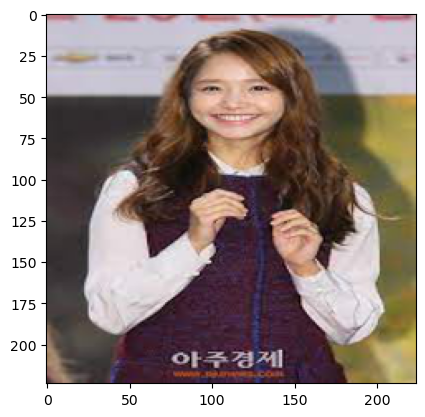

In [17]:
plt.imshow(train_hedgehog[9])

In [11]:
# 문제 데이터 생성(1200개 이미지 데이터 생성)
X = np.concatenate([train_hedgehog, train_hamster, train_meerkat])
y = np.array([0]*50+ [1]*400 + [2]*50)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 224, 224, 3)
(100, 224, 224, 3)
(400,)
(100,)


#### NPZ(Numpy Zip)
- 배열 데이터를 압축해서 저장한 파일 형식 

In [23]:
np.savez_compressed('animals.npz', # 저장될 경로 및 파일명 설정
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test)